In [17]:
import numpy as np
from scipy.io import wavfile
import librosa
import matplotlib.pyplot as plt
import pylab

import IPython.display as ipd

In [18]:
def load_wav(path, decimate=None):
    """
        Load audio data.

        Parameters
        ----------
        path : str
            Wav file path.
        decimate : int
            If not None, downsampling by a factor of `decimate` value.

        Returns:
        -------
        S : array-like
            Array of shape (Mel bands, time) containing the spectrogram.
    """
    # Load data
    fs, data = wavfile.read(path)

    data = data.astype(np.float32)

    if decimate is not None:
        data = signal.decimate(data, decimate)
        fs /= decimate

    return fs, data


def create_spec(data, fs, n_mels = 32, n_fft = 2048, hop_len = 1024):
    """
        Compute the Mel spectrogram from audio data.

        Parameters
        ----------
        data : array-like
            Audio data.
        fs : int
            Sampling frequency in Hz.
        n_mels : int
            Number of Mel bands to generate.
        n_fft : int
            Length of the FFT window.
        hop_len : int
            Number of samples between successive frames.

        Returns:
        -------
        S : array-like
            Array of shape (Mel bands, time) containing the spectrogram.
    """
    # Calculate spectrogram
    S = librosa.feature.melspectrogram(
      data, sr=fs, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)
    S = S.astype(np.float32)

    # Convert power to dB
#     S = np.log(S * 10 + 0.001)
    S = librosa.power_to_db(S)

    return S
  
def plot_spec(S):
    """
        Plot a spectrogram.

        Parameters
        ----------
        S : array-like
            Spectrogram.
    """
    plt.figure()
    plt.imshow(S, cmap=plt.get_cmap('inferno'), aspect='auto', origin='lower')
    plt.axis('off')
    plt.show()
    plt.close()

# Load audio

In [19]:
fs, data = load_wav('toy_data/bird1.wav')

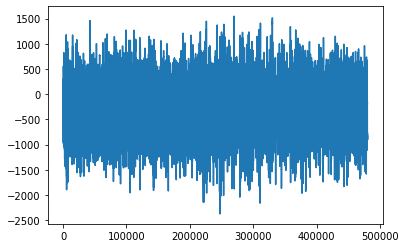

In [20]:
plt.plot(data)

# Listen to the audio

In [21]:
ipd.Audio('toy_data/bird1.wav')

# Create Mel Spectrogram from the audio

In [22]:
fs = 44100
# From Cakir
N_MELS = 40

# MEL spec from STFT 40 ms and 20 ms overlap
N_FFT = int(0.04 * fs) + 1
HOP_LEN = int(0.02 * fs) + 1

In [23]:
S = create_spec(data[:(44100 * 10)], fs, n_mels = N_MELS, n_fft = N_FFT, hop_len = HOP_LEN)

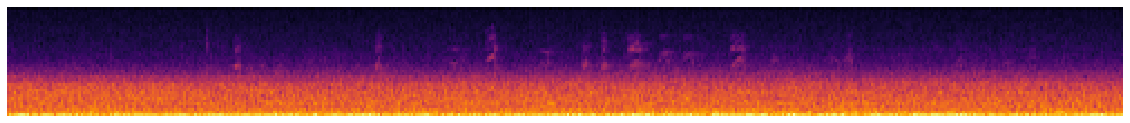

In [24]:
pylab.rcParams['figure.figsize'] = (20, 2)

plot_spec(S)